# ai3 for the same thing

## dependencies

In [189]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

## dataset stuff

### read the dataset

In [190]:
df = pd.read_csv('dataset.csv')
df = df.sample(frac = 1)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
279,58,0,4,130,197,0,0,131,0,0.6,2,0.0,3.0,0
224,63,0,4,108,269,0,0,169,1,1.8,2,2.0,3.0,1
147,41,1,3,112,250,0,0,179,0,0.0,1,0.0,3.0,0
36,43,1,4,120,177,0,2,120,1,2.5,2,0.0,7.0,3
135,55,0,2,135,250,0,2,161,0,1.4,2,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,58,1,4,146,218,0,0,105,0,2.0,2,1.0,7.0,1
169,45,0,2,112,160,0,0,138,0,0.0,2,0.0,3.0,0
54,60,1,4,130,253,0,0,144,1,1.4,1,1.0,7.0,1
14,52,1,3,172,199,1,0,162,0,0.5,1,0.0,7.0,0


### train_test split

In [191]:
ratio = 0.9 # 90:10 train:test ratio
train_set = df.sample(frac=ratio)

# Dropping all those indexes from the dataframe that exists in the train_set
test_set = df.drop(train_set.index)
train_set.shape, test_set.shape

train_set
test_set

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
36,43,1,4,120,177,0,2,120,1,2.5,2,0.0,7.0,3
204,43,1,4,110,211,0,0,161,0,0.0,1,0.0,7.0,0
260,44,0,3,118,242,0,0,149,0,0.3,2,1.0,3.0,0
241,41,0,2,126,306,0,0,163,0,0.0,1,0.0,3.0,0
198,50,0,2,120,244,0,0,162,0,1.1,1,0.0,3.0,0
30,69,0,1,140,239,0,0,151,0,1.8,1,2.0,3.0,0
51,65,1,4,120,177,0,0,140,0,0.4,1,0.0,7.0,0
286,58,0,4,170,225,1,2,146,1,2.8,2,2.0,6.0,2
220,41,0,3,112,268,0,2,172,1,0.0,1,0.0,3.0,0
186,42,1,3,120,240,1,0,194,0,0.8,3,0.0,7.0,0


### formating

In [192]:
# import training dataset

# Clean column names
train_set.columns = train_set.columns.str.strip()

# Handle missing values represented by '?'
train_set = train_set.replace('?', np.nan)

# Convert columns to numeric, drop rows with NaNs
train_set = train_set.dropna()
train_set = train_set.astype(float)

# Split features and labels
X = train_set.drop("diagnosis", axis=1)
y = train_set["diagnosis"]

y = (y > 0.5).astype(float)  # Ensures only 0 or 1

# normalise featuress from minmax scaling (sklearn)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert to PyTorch tensors
inputs = torch.tensor(X_scaled, dtype=torch.float32)
targets = torch.tensor(y.values, dtype=torch.float32)

print(inputs.shape, targets.shape)

torch.Size([267, 13]) torch.Size([267])


In [193]:
# Clean column names
test_set.columns = test_set.columns.str.strip()

# Handle missing values represented by '?'
test_set = test_set.replace('?', np.nan)

# Convert columns to numeric, drop rows with NaNs
test_set = test_set.dropna()
test_set = test_set.astype(float)

# Split features and labels
X_test = test_set.drop("diagnosis", axis=1)
y_test = test_set["diagnosis"]
y_test = (y_test > 0.5).astype(float)  # Ensures only 0 or 1

# Use the same scaler as for training
X_scaled = scaler.transform(X_test)

# Convert to PyTorch tensors
test_tensor = torch.tensor(X_scaled, dtype=torch.float32)
test_target = torch.tensor(y_test.values, dtype=torch.float32)

print(test_tensor.shape, test_target.shape)

torch.Size([30, 13]) torch.Size([30])


## ai

### parameters for layers (basically setup)

In [194]:
class SimpleNN(nn.Module): 
    def __init__(self): 
        super(SimpleNN, self).__init__() 
        self.fc1 = nn.Linear(13, 26)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(26, 32)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(32, 26)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(26, 1) #output layer

        
    def forward(self, x): 
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        return x  # No sigmoid here; use BCEWithLogitsLoss

model = SimpleNN()
print(model)

SimpleNN(
  (fc1): Linear(in_features=13, out_features=26, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=26, out_features=32, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=32, out_features=26, bias=True)
  (relu3): ReLU()
  (fc4): Linear(in_features=26, out_features=1, bias=True)
)


### training

In [195]:
#calculate error
# Use BCEWithLogitsLoss for binary classification
criterion = nn.BCEWithLogitsLoss()
optimiser = optim.SGD(model.parameters(), lr=0.01)

# Ensure targets are shape (N, 1)
targets = targets.view(-1, 1)
print(targets)

tensor([[1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
      

In [196]:
# learning rate
lr = 0.0001

Epoch [1/5000], Loss: 0.6947
Epoch [2/5000], Loss: 0.6947
Epoch [3/5000], Loss: 0.6947
Epoch [4/5000], Loss: 0.6946
Epoch [5/5000], Loss: 0.6946
Epoch [6/5000], Loss: 0.6946
Epoch [7/5000], Loss: 0.6945
Epoch [8/5000], Loss: 0.6945
Epoch [9/5000], Loss: 0.6945
Epoch [10/5000], Loss: 0.6944
Epoch [11/5000], Loss: 0.6944
Epoch [12/5000], Loss: 0.6944
Epoch [13/5000], Loss: 0.6943
Epoch [14/5000], Loss: 0.6943
Epoch [15/5000], Loss: 0.6943
Epoch [16/5000], Loss: 0.6942
Epoch [17/5000], Loss: 0.6942
Epoch [18/5000], Loss: 0.6942
Epoch [19/5000], Loss: 0.6941
Epoch [20/5000], Loss: 0.6941
Epoch [21/5000], Loss: 0.6941
Epoch [22/5000], Loss: 0.6940
Epoch [23/5000], Loss: 0.6940
Epoch [24/5000], Loss: 0.6940
Epoch [25/5000], Loss: 0.6939
Epoch [26/5000], Loss: 0.6939
Epoch [27/5000], Loss: 0.6939
Epoch [28/5000], Loss: 0.6939
Epoch [29/5000], Loss: 0.6938
Epoch [30/5000], Loss: 0.6938
Epoch [31/5000], Loss: 0.6938
Epoch [32/5000], Loss: 0.6937
Epoch [33/5000], Loss: 0.6937
Epoch [34/5000], Lo

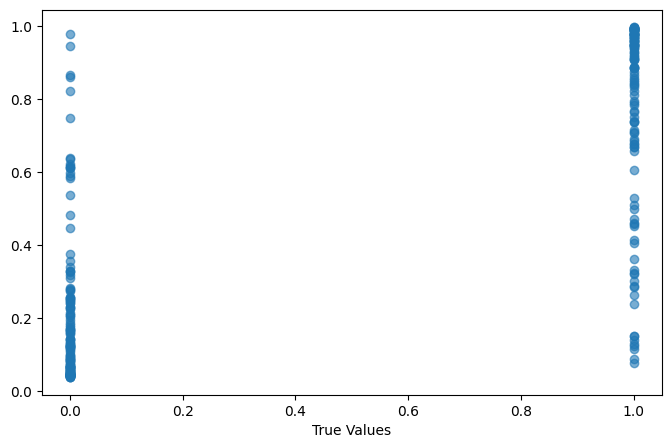

In [197]:
for epoch in range(5000):
    optimiser.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    if torch.isnan(loss):
        print("Loss is NaN!")
        break
    loss.backward()
    optimiser.step()
#    if (epoch + 1) % 500 == 0:
    print(f'Epoch [{epoch + 1}/5000], Loss: {loss.item():.4f}')
print(outputs)

# Evaluate on training set
with torch.no_grad():
    outputs = model(inputs)
    preds = torch.sigmoid(outputs)
    predicted_classes = (preds > 0.5).float()
    accuracy = (predicted_classes == targets).float().mean()
    print(f"Training Accuracy: {accuracy.item()*100:.2f}%")

    # Plot predictions vs. true values
    plt.figure(figsize=(8, 5))
    plt.scatter(targets.numpy(), preds.numpy(), alpha=0.6)
    plt.xlabel("True Values")

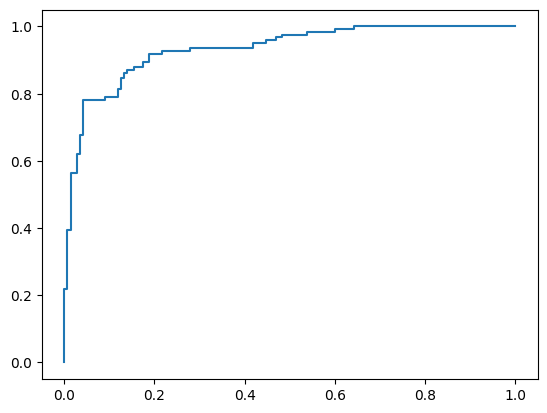

In [198]:
# roc curve
fpr, tpr, _ = roc_curve(targets.numpy(), preds.numpy())
plt.plot(fpr, tpr, label = "ROC Curve")

### testing

Test Accuracy: 86.67%


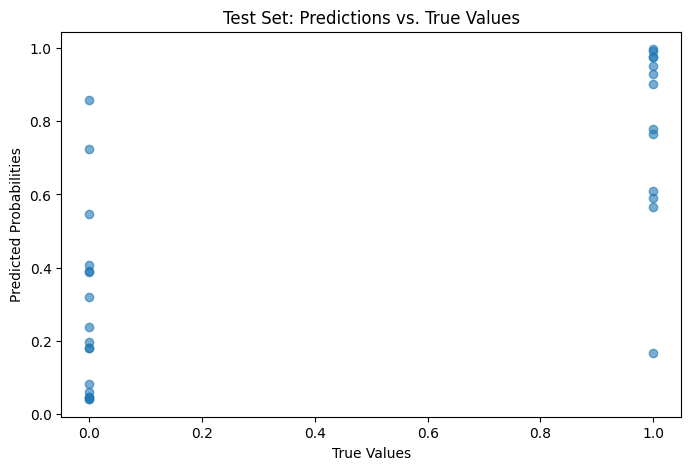

In [199]:
# Test the model on the test set
with torch.no_grad():
    test_outputs = model(test_tensor)
    test_probs = torch.sigmoid(test_outputs)
    test_predicted = (test_probs > 0.5).float()
    test_accuracy = (test_predicted == test_target.view(-1, 1)).float().mean()
    print(f"Test Accuracy: {test_accuracy.item()*100:.2f}%")

    # Optional: plot predictions vs. true values
    plt.figure(figsize=(8, 5))
    plt.scatter(test_target.numpy(), test_probs.numpy(), alpha=0.6)
    plt.xlabel("True Values")
    plt.ylabel("Predicted Probabilities")
    plt.title("Test Set: Predictions vs. True Values")
    plt.show()

## ui